In [1]:
import pandas as pd
import numpy as num_paths
import matplotlib.pyplot as psnrResault
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("dataTest.csv")

In [3]:
df=pd.DataFrame(df)
df.head()

,host,avgRTT,packetLoss,latency,hopCount,bandwidth,yukOrani,psnr,ssim_first,ssim_second,type,server
0,h1,1898.137,0.0,66,4,3000000,2011.425000,31.225948,0.985150,18.282783,3,h10
1,h2,2240.660,0.0,44,3,3000000,1859.161290,31.225948,0.985150,18.282674,3,h14
2,h3,2196.294,0.0,40,2,3000000,9084.620155,22.700112,0.956348,13.599976,3,h14
3,h4,1298.732,0.0,60,3,3000000,25815.963636,22.301604,0.960533,14.037636,3,h14
4,h5,338.105,0.0,92,4,3000000,37246.273632,22.510259,0.958593,13.829213,3,h10


In [4]:
df.dropna(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,360.0,1.029936e+03,1.046241e+03,1.529400e+02,3.096350e+02,4.235220e+02,1.859842e+03,4.744949e+03
packetLoss,360.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
latency,360.0,7.866389e+01,6.671225e+01,1.300000e+01,5.275000e+01,7.450000e+01,9.125000e+01,1.035000e+03
hopCount,360.0,3.108333e+00,1.051296e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,360.0,5.319444e+06,2.637983e+06,3.000000e+06,3.000000e+06,5.000000e+06,5.000000e+06,1.000000e+07
yukOrani,360.0,3.063770e+04,2.560854e+04,4.751573e+02,9.132790e+03,2.588607e+04,4.449114e+04,1.770201e+05
psnr,360.0,3.678594e+01,1.646139e+01,1.267172e+01,2.194262e+01,3.122953e+01,5.505260e+01,5.506194e+01
ssim_first,360.0,9.290974e-01,1.225030e-01,5.138590e-01,9.421713e-01,9.852710e-01,9.997650e-01,9.997650e-01
ssim_second,360.0,2.243359e+01,1.249835e+01,3.132379e+00,1.237905e+01,1.831822e+01,3.628266e+01,3.628266e+01
type,360.0,3.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


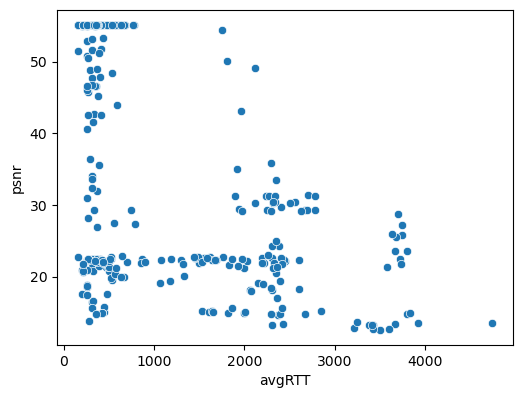

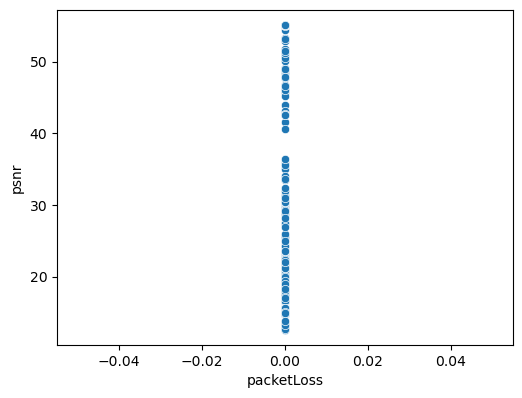

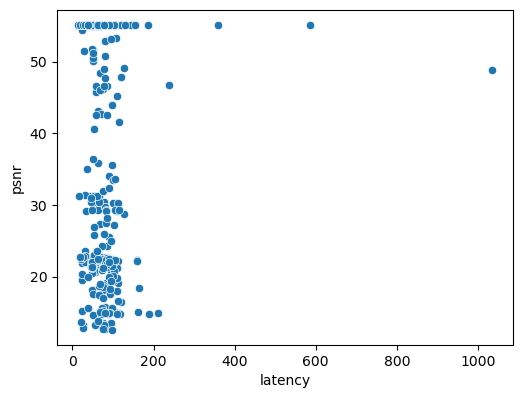

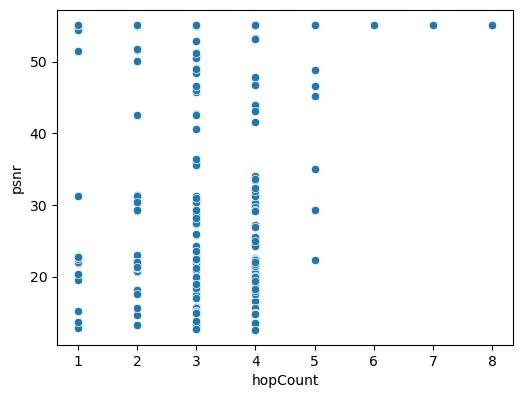

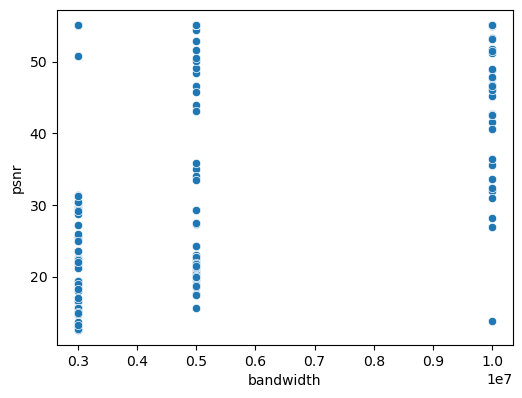

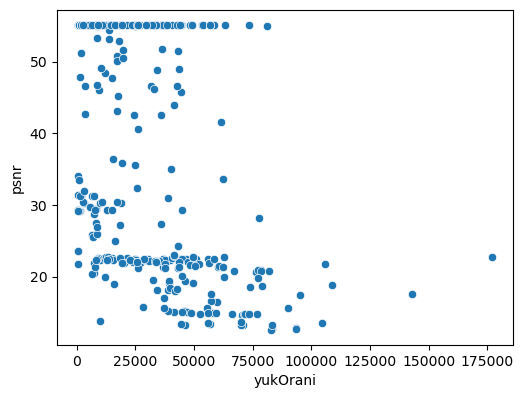

In [5]:
sayisal_veriler=["avgRTT","packetLoss","latency","hopCount","bandwidth","yukOrani"]
for i,deger in enumerate(sayisal_veriler):
    plt.figure(figsize=(20,20))
    ax=plt.subplot(4,3,i+1)
    sns.scatterplot(x=deger,y="psnr",data=df)
    plt.show()

In [6]:
# sns.displot(df)

In [7]:
y=df["ssim_first"]
x=df.drop(["host","ssim_first","ssim_second","type","psnr","server","packetLoss"],axis="columns")
y


0      0.985150
1      0.985150
2      0.956348
3      0.960533
4      0.958593
         ...   
357    0.999764
358    0.999765
359    0.999765
360    0.999765
361    0.999765
Name: ssim_first, Length: 360, dtype: float64

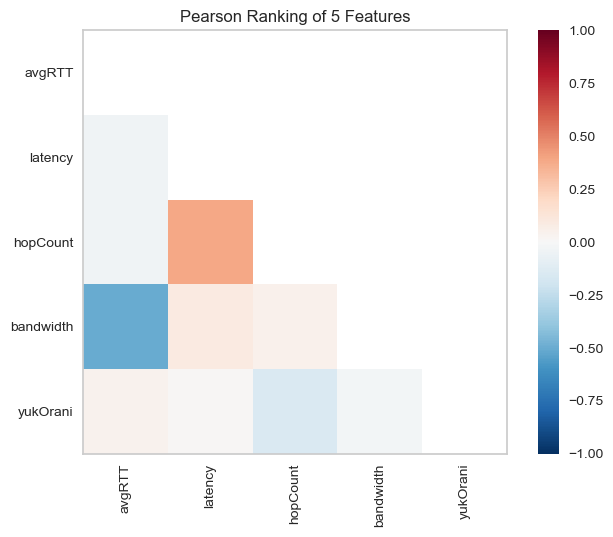

<AxesSubplot:title={'center':'Pearson Ranking of 5 Features'}>

In [8]:
from yellowbrick.features import Rank2D
visualizer=Rank2D(algorithm="pearson")
visualizer.fit(x,y)
visualizer.transform(x)
visualizer.show()

In [9]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,360.0,1.029936e+03,1.046241e+03,1.529400e+02,3.096350e+02,4.235220e+02,1.859842e+03,4.744949e+03
latency,360.0,7.866389e+01,6.671225e+01,1.300000e+01,5.275000e+01,7.450000e+01,9.125000e+01,1.035000e+03
hopCount,360.0,3.108333e+00,1.051296e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,360.0,5.319444e+06,2.637983e+06,3.000000e+06,3.000000e+06,5.000000e+06,5.000000e+06,1.000000e+07
yukOrani,360.0,3.063770e+04,2.560854e+04,4.751573e+02,9.132790e+03,2.588607e+04,4.449114e+04,1.770201e+05


In [10]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(x,y,test_size=0.5, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.5342339512941789


In [12]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.4855850460664213 test: 0.29031776407288423
max_depth : 2 --> score r2 : eğitim:0.7512320199032528 test: 0.6266363046179775
max_depth : 3 --> score r2 : eğitim:0.8299999892610358 test: 0.7438341444881791
max_depth : 4 --> score r2 : eğitim:0.9066541835420019 test: 0.7833607131852324
max_depth : 5 --> score r2 : eğitim:0.9433533472829345 test: 0.789664372395634
max_depth : 6 --> score r2 : eğitim:0.9598172126317612 test: 0.787261156658531
max_depth : 7 --> score r2 : eğitim:0.9625970222312623 test: 0.7858507622003243
max_depth : 8 --> score r2 : eğitim:0.9656354901050327 test: 0.8066429990468008
max_depth : 9 --> score r2 : eğitim:0.9686409792621195 test: 0.790360391514537
max_depth : 10 --> score r2 : eğitim:0.9679567965163749 test: 0.8005762267502994
max_depth : 11 --> score r2 : eğitim:0.9678988292076797 test: 0.7958253133534023
max_depth : 12 --> score r2 : eğitim:0.968032565563465 test: 0.7893995575467726
max_depth : 13 --> score r2 : eğitim:0.9

In [13]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.5971472526475909
n_neigbors : 2 --> score r2 : eğitim:0.8849114733489526 test: 0.6854973139144933
n_neigbors : 3 --> score r2 : eğitim:0.8658014869658786 test: 0.7234929616218332
n_neigbors : 4 --> score r2 : eğitim:0.8371411414142838 test: 0.729176952879127
n_neigbors : 5 --> score r2 : eğitim:0.8214980561821349 test: 0.7198685976814057
n_neigbors : 6 --> score r2 : eğitim:0.7916661043271016 test: 0.6888975084761142
n_neigbors : 7 --> score r2 : eğitim:0.7929860466467693 test: 0.6965003855412801
n_neigbors : 8 --> score r2 : eğitim:0.7907332458865561 test: 0.6917349516549869
n_neigbors : 9 --> score r2 : eğitim:0.7906397086487276 test: 0.6942835166820305
n_neigbors : 10 --> score r2 : eğitim:0.78681243689903 test: 0.7087503946826177
n_neigbors : 11 --> score r2 : eğitim:0.7892619110191463 test: 0.7020129143922293
n_neigbors : 12 --> score r2 : eğitim:0.7822709952422544 test: 0.7100012787102232
n_neigbors : 13 --> score r2 : eğitim:0.781

In [14]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.40995936960595214 test: 0.1083993975395211
max_depth : 2 --> score r2 : eğitim:0.7161743072843078 test: 0.5869665297024721
max_depth : 3 --> score r2 : eğitim:0.7979486563097207 test: 0.7156091276570054
max_depth : 4 --> score r2 : eğitim:0.9227405212573188 test: 0.7743012391980656
max_depth : 5 --> score r2 : eğitim:0.9615683947868278 test: 0.7444323066036574
max_depth : 6 --> score r2 : eğitim:0.9819624919458777 test: 0.6315374883876812
max_depth : 7 --> score r2 : eğitim:0.9957473662605042 test: 0.7013878499210877
max_depth : 8 --> score r2 : eğitim:0.9993942289096709 test: 0.7125503090367817
max_depth : 9 --> score r2 : eğitim:0.999968379835217 test: 0.762602025121945
max_depth : 10 --> score r2 : eğitim:0.9999950732633835 test: 0.6055499797735228
max_depth : 11 --> score r2 : eğitim:0.9999988259460474 test: 0.7326244522830601
max_depth : 12 --> score r2 : eğitim:0.9999997015482193 test: 0.7359452827708413
max_depth : 13 --> score r2 : eğitim:0

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.7036947591762954 test: 0.5374961809914345
max_depth : 2 --> score r2 : eğitim:0.924254626480148 test: 0.6918673715881261
max_depth : 3 --> score r2 : eğitim:0.9808636251342951 test: 0.6961436958733762
max_depth : 4 --> score r2 : eğitim:0.9975348493104046 test: 0.7697462611537776
max_depth : 5 --> score r2 : eğitim:0.9997626834788024 test: 0.7632663185550013
max_depth : 6 --> score r2 : eğitim:0.9999889534258114 test: 0.7767345378778474
max_depth : 7 --> score r2 : eğitim:0.9999992485162029 test: 0.795707814933456
max_depth : 8 --> score r2 : eğitim:0.9999999896551907 test: 0.7421499213577705
max_depth : 9 --> score r2 : eğitim:0.9999999989966657 test: 0.7441099684350506


In [16]:
from sklearn.tree import ExtraTreeRegressor
for i in range(1,10,1):
    extraTree=ExtraTreeRegressor(max_depth=i)
    extraTree.fit(XTrain,yTrain)
    tahminExtra=extraTree.predict(XTest)
    print(r2_score(yTest,tahminExtra))

0.026583607626005312
0.13149493328895379
0.3738825170468947
0.6970739991558099
0.6393255460550685
0.5099524868145848
0.660127136955162
0.6210575850373437
0.6632024184514533


In [17]:
from sklearn.linear_model import RANSACRegressor
ransacReg=RANSACRegressor(random_state=42,)
ransacReg.fit(XTrain,yTrain)
print(r2_score(yTest,ransacReg.predict(XTest)))

-0.22087940549133478


In [18]:
yTest

225    0.784194
42     0.769184
286    0.999765
303    0.999764
56     0.729143
         ...   
254    0.983920
130    0.982197
38     0.931159
11     0.955942
235    0.653499
Name: ssim_first, Length: 180, dtype: float64

In [19]:
yTrain

342    0.999765
113    0.999765
180    0.963987
234    0.656911
224    0.960831
         ...   
71     0.999765
107    0.999756
271    0.534366
350    0.999765
103    0.999765
Name: ssim_first, Length: 180, dtype: float64

In [20]:
sayisal_veriler=["avgRTT","latency","hopCount","bandwidth","yukOrani"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
XTrain[sayisal_veriler]=scaler.fit_transform(XTrain[sayisal_veriler])
XTest[sayisal_veriler]=scaler.transform(XTest[sayisal_veriler])

In [21]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.5342339512942025


In [22]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.3831444306473385
n_neigbors : 2 --> score r2 : eğitim:0.8994263519922199 test: 0.5740730843372912
n_neigbors : 3 --> score r2 : eğitim:0.8696658330307775 test: 0.6445185207753714
n_neigbors : 4 --> score r2 : eğitim:0.8233627872914859 test: 0.6227926788574991
n_neigbors : 5 --> score r2 : eğitim:0.7929143060078698 test: 0.6430031613607793
n_neigbors : 6 --> score r2 : eğitim:0.7747358073523276 test: 0.6348368730291812
n_neigbors : 7 --> score r2 : eğitim:0.7624969193049943 test: 0.6287130066331234
n_neigbors : 8 --> score r2 : eğitim:0.7472896231046839 test: 0.6257226527489669
n_neigbors : 9 --> score r2 : eğitim:0.7334003484652909 test: 0.6163759120267944
n_neigbors : 10 --> score r2 : eğitim:0.7210109729759093 test: 0.6237402430500147
n_neigbors : 11 --> score r2 : eğitim:0.7019076196145919 test: 0.6154929348871612
n_neigbors : 12 --> score r2 : eğitim:0.6859618915464738 test: 0.6127097203979984
n_neigbors : 13 --> score r2 : eğitim:0.

In [27]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.4667616961024311 test: 0.25433266573751867
max_depth : 2 --> score r2 : eğitim:0.7549922510487476 test: 0.6368918834043723
max_depth : 3 --> score r2 : eğitim:0.8228159104707832 test: 0.7282608625692067
max_depth : 4 --> score r2 : eğitim:0.9047723980313602 test: 0.7883489918239008
max_depth : 5 --> score r2 : eğitim:0.9422456110167567 test: 0.7917178142108134
max_depth : 6 --> score r2 : eğitim:0.9601009715955152 test: 0.788844744780739
max_depth : 7 --> score r2 : eğitim:0.9642976400580062 test: 0.8129916065221808
max_depth : 8 --> score r2 : eğitim:0.9701878384335442 test: 0.7943475632325551
max_depth : 9 --> score r2 : eğitim:0.9646855505761126 test: 0.8019111168709814
max_depth : 10 --> score r2 : eğitim:0.9657864615982262 test: 0.8114214413551875
max_depth : 11 --> score r2 : eğitim:0.9714537888180073 test: 0.795567073147932
max_depth : 12 --> score r2 : eğitim:0.9693788892289616 test: 0.8047199193951756
max_depth : 13 --> score r2 : eğitim:0

In [24]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.40995936960595214 test: 0.10839939753952044
max_depth : 2 --> score r2 : eğitim:0.7161743072843078 test: 0.5869665297024722
max_depth : 3 --> score r2 : eğitim:0.7979486563097207 test: 0.7156091276570051
max_depth : 4 --> score r2 : eğitim:0.9227405212573188 test: 0.7743012391980656
max_depth : 5 --> score r2 : eğitim:0.9615683947868278 test: 0.6978154041373767
max_depth : 6 --> score r2 : eğitim:0.9819624919458777 test: 0.6697500509501313
max_depth : 7 --> score r2 : eğitim:0.9957473662605042 test: 0.7144371295088991
max_depth : 8 --> score r2 : eğitim:0.9993942289096709 test: 0.6086545041792317
max_depth : 9 --> score r2 : eğitim:0.999968379835217 test: 0.6987862732687746
max_depth : 10 --> score r2 : eğitim:0.9999950732633835 test: 0.7636496462009961
max_depth : 11 --> score r2 : eğitim:0.9999988259460474 test: 0.7683280449042552
max_depth : 12 --> score r2 : eğitim:0.9999997015482193 test: 0.6783836453640149
max_depth : 13 --> score r2 : eğitim

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.7036947591762954 test: 0.5374961809914345
max_depth : 2 --> score r2 : eğitim:0.9242546264801479 test: 0.6916279663517855
max_depth : 3 --> score r2 : eğitim:0.9808636251342951 test: 0.6986448577791425
max_depth : 4 --> score r2 : eğitim:0.9975348493104046 test: 0.7693155979322648
max_depth : 5 --> score r2 : eğitim:0.9997626834788024 test: 0.7606123894196818
max_depth : 6 --> score r2 : eğitim:0.9999889534258114 test: 0.7838967170902658
max_depth : 7 --> score r2 : eğitim:0.9999992485162029 test: 0.775571942672747
max_depth : 8 --> score r2 : eğitim:0.9999999896551907 test: 0.7798898282405055
max_depth : 9 --> score r2 : eğitim:0.9999999989966657 test: 0.7560471878713932
